# Data analysis

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/cleaned_airquality.csv")
dataset.head().T

0             1             2             3             4
year             2013          2013          2013          2013          2013
month               3             3             3             3             3
day                 1             1             1             1             1
hour                0             1             2             3             4
PM25              4.0           8.0           7.0           6.0           3.0
PM10              4.0           8.0           7.0           6.0           3.0
SO2               4.0           4.0           5.0          11.0          12.0
NO2               7.0           7.0          10.0          11.0          12.0
CO              300.0         300.0         300.0         300.0         300.0
O3               77.0          77.0          73.0          72.0          72.0
TEMP             -0.7          -1.1          -1.1          -1.4          -2.0
PRES           1023.0        1023.2        1023.5        1024.5        1025.2
DEWP            -18.8         -18.2         -18.2         -19.4         -19.5
RAIN              0.0           0.0           0.0           0.0           0.0
wd                NNW             N           NNW            NW             N
WSPM              4.4           4.7           5.6           3.1           2.0
station  Aotizhongxin  Aotizhongxin  Aotizhongxin  Aotizhongxin  Aotizhongxin

<a id="analysis"></a>
## Data analysis

### The Concentration of PM25 and PM10 per Year

In [4]:
year_pm25 = (
    dataset[["PM25", "year", "station"]]
    .groupby(["year"])
    .median()
    .reset_index()
    .sort_values(by="year", ascending=False)
)

year_pm25

year  PM25
4  2017  48.0
3  2016  50.0
2  2015  54.0
1  2014  60.0
0  2013  58.0

<AxesSubplot:xlabel='year', ylabel='PM25'>

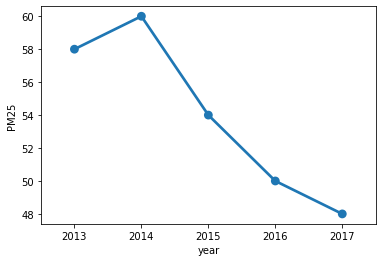

In [5]:
sns.pointplot(x="year", y="PM25", data=year_pm25)

### Checking for Correlations between Features

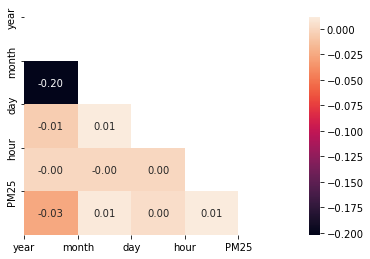

In [6]:
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()